# Renta por provincia

In [3]:
import pandas as pd
import re
import plotly.graph_objects as go
# Leemos el CSV con los códigos por provincia eliminando las 5 primeras columnas que ya
# hemos visto que no son relevantes.
bizkaia = pd.read_csv('datos_renta/Bizkaia.csv', index_col=False,encoding='iso-8859-1',sep=';',skiprows=5)

In [5]:
bbdd = ["Alava","Albacete","Alicante","Almeria","Asturias","Avila","Badajoz","Barcelona",
        "Bizkaia","Burgos","Caceres","Cadiz","Cantabria","Islas Baleares","Castellon","Ceuta","Ciudad Real",
        "Cordoba","Coruña","Cuenca","Gipuzkoa","Girona","Granada","Guadalajara","Huelva","Huesca","Jaen","La Rioja",
        "Las Palmas","Leon","LLeida","Lugo","Madrid","Malaga","Melilla","Murcia","Navarra","Ourense","Palencia","Pontevedra",
       "Salamanca","Santa Cruz de Tenerife","Segovia","Sevilla","Soria","Tarragona","Teruel","Toledo","Valencia",
        "Valladolid","Zamora","Zaragoza"]
def get_BBDD_rentas (bbdd):
    #Carga de ficheros CSV
    base = []
    INE = []
    renta = []
    poblacion = []
    provincias = []
    for i in bbdd:
        provincia = i
        datos = pd.read_csv('datos_renta/'+i+'.csv', index_col=False,encoding='iso-8859-1'
                            ,sep=';',skiprows=5, decimal= ',',thousands='.')
        datos.rename(columns={'Unnamed: 0':'identificador','2016':'renta'},inplace=True)
        datos.drop(datos.tail(3).index,inplace=True)
        for i in range(len(datos.identificador)):
            provincias.append(provincia)
        for i in range(len(datos.identificador)):
            INE_value = int(re.findall("[0-9]+", datos.identificador[i])[0])
            INE.append(INE_value) 
        for i in range(len(datos.identificador)):
             nombre = re.findall("[a-zA-Záéíóúñ\\- /]+", datos.identificador[i])[0]
             nombre = re.sub(" sección","",nombre)
             nombre = re.sub(" secci","",nombre)
             poblacion.append(nombre)
        for i in range(len(datos.identificador)):
            if datos.renta[i] == '.':
                datos.renta[i] = float('NaN')
            if isinstance(datos.renta[i],str) == True:
                renta_value = float(re.sub("\\.","",datos.renta[i]))
                renta.append(renta_value)
            else:
                renta_value = float(datos.renta[i])
                renta.append(renta_value)
    d = {'provincia':provincias,'poblacion':poblacion,'INE':INE,'renta':renta}
    datos = pd.DataFrame(d)
    return datos

basedatos = get_BBDD_rentas(bbdd)
basedatos.head()

fig = go.Figure(data=[go.Table(
                header = dict(values = ['Provincia', 'Población', 'INE', 'Renta'],
                              fill = dict(color = 'goldenrod'),
                             font = dict(size = 20, color = 'white')),
                cells = dict(values = [basedatos.provincia, basedatos.poblacion, basedatos.INE, basedatos.renta],
                            fill = dict(color = ['lemonchiffon','khaki','lemonchiffon','khaki'])))
                     ])
fig.show()

A continuación, se ha realizado un gráfico para representar la renta media de cada provincia y poder ver la brecha salarial que existe entre las provincias de España. Para ello, se ha utilizado la renta media de cada provincia y el gráfico utilizado ha sido un gráfico de barras.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
datos_renta = basedatos.groupby('provincia', as_index =False ).renta.mean()
datos_renta = datos_renta.sort_values('renta',ascending=False)
datos_renta

fig = go.Figure(data=[go.Table(
                header = dict(values = ['Provincia', 'Renta'],
                              fill = dict(color = 'goldenrod'),
                             font = dict(size = 20, color = 'white')),
                cells = dict(values = [basedatos.provincia, basedatos.renta],
                            fill = dict(color = ['lemonchiffon','khaki'])))
                     ])
fig.show()

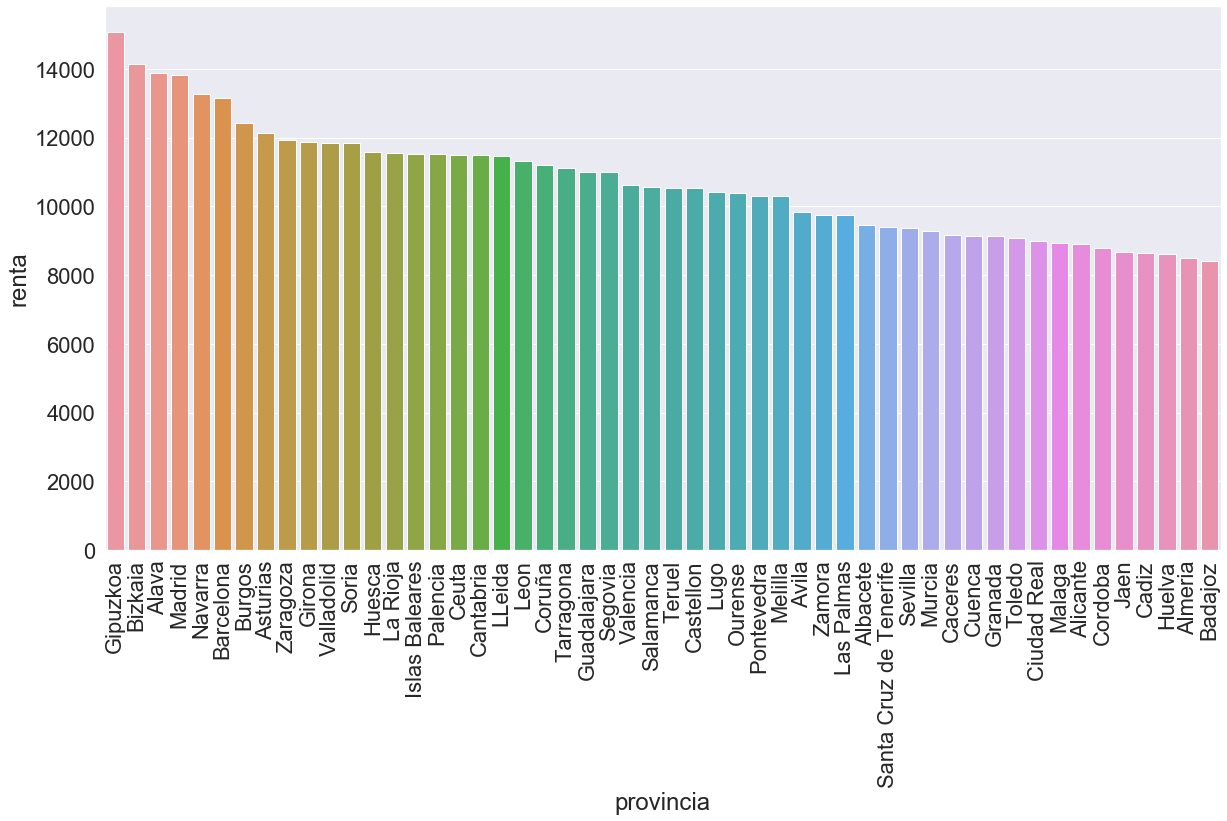

In [58]:
plt.figure(figsize=(20,10))
out = sns.barplot(x='provincia', y= 'renta',data=datos_renta)
out =out.set_xticklabels(out.get_xticklabels(), rotation=90)
out =sns.set(font_scale=2)
out

Como se puede observar en el gráfico las tres provincias con la renta media más alta son Gipuzkoa, Bizkaia y Álava. De lo contrario, las provincias con la renta media más baja son Huelva Álmeria y Badajoz.